### Example of a well-fit model that uses more assumptions

There are two simple models (and perhaps more) for the spread of diseases.

$ f(x) = mx + c $, where $ m $ is fit to some data. This might make sense for where people transmit an airborne virus and the outcome depends on how many people there are in an area.

$ f(x) = c $, which implies that the rate of spread is constant regardless of parameters. This might make sense for sexually transmitted diseases where people don't have more sex when there are more people nearby, for example.


In [1]:
def model_1(x):
    y_intercept = .01 #This will never actually be 0
    gradient = .5 # eg fit to linear x space, in this case arbitrarily set
    return gradient*x + y_intercept

def model_2(x):
    y_intercept = 1 # This doesn't seem intuitive and is one reason the model falls over when x=0
    gradient = 0
    return gradient*x + y_intercept

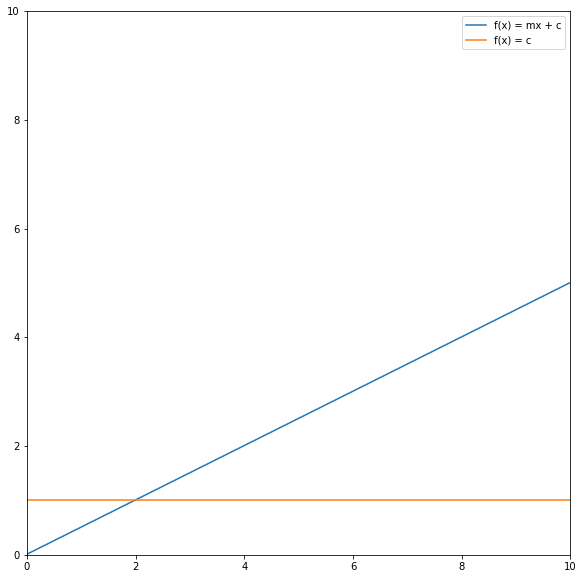

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_limits = (0, 10)
x_count = x_limits[1] - x_limits[0] + 1 #+1 for 0
y_limits = (0, 10)

fig = plt.figure(figsize=(10,10))
axes = plt.subplot()

x = np.linspace(x_limits[0],x_limits[1], num=x_count)

# Static
axes.plot(x, model_1(x))
axes.plot(x, model_2(x))


axes.set_aspect( 1 )
axes.set_xbound(x_limits)
axes.set_ybound(y_limits)

plt.legend(["f(x) = mx + c", "f(x) = c"])

plt.show()

For a situation where you don't know how the population will behave or how a virus would spread, then you could use a model with another parameter.

$ f(x, q) = m^q x + c^\frac{1}{q} $

In [3]:
def model_3(x, q):
    y_intercept = .01**(1/q)
    gradient = .5**q
    return gradient*x + y_intercept

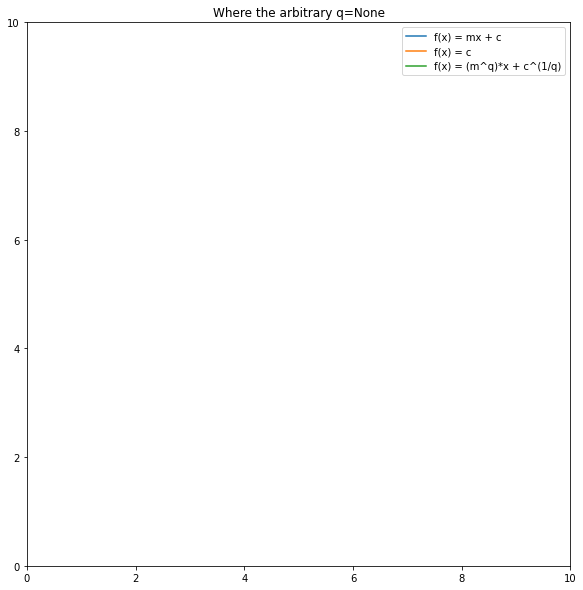

In [4]:
x_limits = (0, 10)
x_count = x_limits[1] - x_limits[0] + 1 #+1 for 0
y_limits = (0, 10)

fig = plt.figure(figsize=(10,10))
axes = plt.subplot()

x = np.linspace(x_limits[0],x_limits[1], num=x_count)
q = None

# To be updated during animation
txt_title = axes.set_title('')
model_1_line, = axes.plot([], [])
model_2_line, = axes.plot([], [])
model_3_line, = axes.plot([], [])
 
axes.set_aspect( 1 )
axes.set_xbound(x_limits)
axes.set_ybound(y_limits)

plt.title("Where the arbitrary q={}".format(q))
plt.legend(["f(x) = mx + c", "f(x) = c", "f(x) = (m^q)*x + c^(1/q)"])

plt.show()

In [5]:
from matplotlib import animation

def drawframe(n, *fargs):
    # TODO - skip n=0, because that's division by 0 and it isn't defined.
    if n == 0 or n == 1:
        q = 1
    else:
        q = n / 2

    # Note, python here is accessing the lines defined in previous scope level, yuk but come at me
    model_1_line.set_data(x, model_1(x))
    model_2_line.set_data(x, model_2(x))
    model_3_line.set_data(x, model_3(x,q))
    
    txt_title.set_text("Where the arbitrary q={}".format(q))
    return (model_1_line, model_2_line, model_3_line)

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=1, blit=True)

from IPython.display import HTML 
import subprocess
writervideo = animation.FFMpegWriter(fps=4)
anim.save('diseaseSpreadModels.mp4', writer=writervideo)

subprocess.run(["ffmpeg", "-i", "diseaseSpreadModels.mp4", "diseaseSpreadModels.gif"])
                               

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CompletedProcess(args=['ffmpeg', '-i', 'diseaseSpreadModels.mp4', 'diseaseSpreadModels.gif'], returncode=1)

![models_compared](diseaseSpreadModels.gif)

Then, this gives us more flexibility to use this model but the added sophistication now requires an extra parameter. In making recommendations to stakeholders, you would need to ask them to make assumptions about the value of $ q $. This tradeoff between sophistication and simplicity is a constant in the practice of mathematical modelling.